## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)


Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here, `astroML.datasets.generate_mu_z` is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### OPTIONAL
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.


---



# Supernovae data analysis

## Data Loading

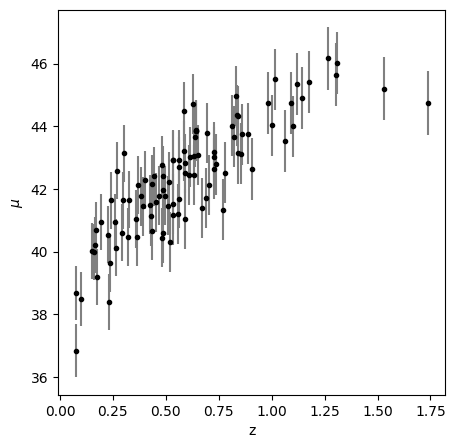

In [9]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.figure(figsize=(5, 5))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.show()

## Linear Regression

The linear regression is the simplest model one can use to fit a dataset. 
In this way er are assuming the data are distributed along a straight line, following the equation:
$$
y_i = \theta_0 + \theta_1 x_i + \epsilon_i \hspace{1cm} \epsilon_i = \mathcal{N}(0, \sigma_i)
$$
where $\theta_0$ is the intercept, $\theta_1$ is the slope and $\epsilon_i$ is a Gaussian noise with zero mean and standard deviation $\sigma_i$.

We can than compute the likelihood of the data as: 
$$
\mathcal{L}(\theta_0, \theta_1) = p(D|\theta_0, \theta_1) = \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp\bigg(-\frac{y_i - (\theta_0 + \theta_1 x_i)^2}{2 \sigma_i^2}\bigg)
$$
and the log-likelihood as:
$$
\ln \mathcal{L}(\theta_0, \theta_1) = -\frac{1}{2} \sum_{i=1}^{N} \bigg[ \ln(2 \pi \sigma_i^2) + \frac{(y_i - (\theta_0 + \theta_1 x_i))^2}{\sigma_i^2} \bigg]
$$

To find the best set of parameters we have to maximize this expression. 
### Homoschedastic uncertainties
In the case of homoschedastic uncertainties, i.e. $\sigma_i = \sigma$ for all $i$ the parmeters are: 
$$
\sigma^2 =\sum_{i=1}^{N} (y_i - (\theta_0 + \theta_1 x_i))^2
$$
$$
\theta_1 = \frac{\sum_{i=1}^{N} x_i y_i - \bar{x}\bar{y}}{\sum_{i=1}^{N} (x_i - \bar{x})^2}\hspace{1cm}\sigma_{\theta_1}^2 = \frac{\sigma^2}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$
$$
\theta_0 = \bar{y} - \theta_1 \bar{x} \hspace{1cm} \sigma_{\theta_0} = \sigma^2\frac{1}{N} + \frac{\bar{x}^2}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$
### Heteroschedastic uncertainties
In the case of heteroschedastic uncertainties, i.e. $\sigma_i \neq \sigma_j$ for $i \neq j$ we can think in an other way, the idea is to use matrix notation. 
$$
Y = X\Theta \hspace{1cm} \Theta = 
\begin{pmatrix}
\theta_0 \\
\theta_1
\end{pmatrix}
\hspace{1cm} X =
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N
\end{pmatrix}
\hspace{1cm} Y =
\begin{pmatrix}
y_1 \\
y_2 \\  
\vdots \\
y_N
\end{pmatrix}
$$
where $X$ is the **design matrix**.

The log-likelihood can be written as:
$$
\ln \mathcal{L}(\Theta) = -\frac{1}{2} \bigg[ N \ln(2 \pi) + \ln(|C|) + (Y - X\Theta)^T C^{-1} (Y - X\Theta) \bigg]
$$
where $C$ is the **covariance matrix** and in this case is a diagona matrix:
$$
C = \begin{pmatrix}
\sigma_1^2 & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_N^2
\end{pmatrix}
$$

To find the best set of parameters we have to maximize this expression.
The solution is:
$$
\Theta = (X^T C^{-1} X)^{-1} (X^T C^{-1} Y)
\hspace{1cm} \Sigma = (X^T C^{-1} X)^{-1}=\begin{pmatrix}
\sigma_{\theta_0}^2 & \sigma_{\theta_0, \theta_1} \\
\sigma_{\theta_0, \theta_1} & \sigma_{\theta_1}^2
\end{pmatrix}
$$

Linear model parameters: [39.48384602  4.76438865]


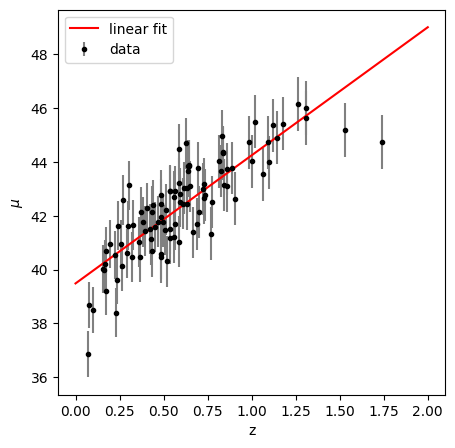

In [10]:
from astroML.linear_model import LinearRegression
import numpy as np

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(z_sample[:, None], mu_sample, dmu)
linear_parameters = linear_model.coef_

print("Linear model parameters:", linear_parameters)

plt.figure(figsize=(5, 5))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', label='data')
z_fit = np.linspace(0, 2, 1000)
mu_fit = linear_model.predict(z_fit[:, None])
plt.plot(z_fit, mu_fit, '-r', label='linear fit')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend()
plt.show()

## Polynomial Regression
The ideaa behind polynomial regression is to extend the linear model to a polynomial one, so the equation becomes:
$$
y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + ... + \theta_n x_i^n + \epsilon_i
$$  
where $n$ is the degree of the polynomial.

The idea is the same as before, but we havve to change the design matrix:
$$
X =
\begin{pmatrix}
1 & x_1 & x_1^2 & ... & x_1^n \\
1 & x_2 & x_2^2 & ... & x_2^n \\
\vdots & \vdots & \vdots & ... & \vdots \\
1 & x_N & x_N^2 & ... & x_N^n
\end{pmatrix}
$$

***Observation:*** 
- Increasing the degree of the polynomial we can always improve the fit, but this can lead to overfitting.
- We still talk about linear regression because the model is linear in the parameters $\theta_i$.

Degree 2 model parameters: [38.41076899  8.59831905 -2.64090751]
Degree 3 model parameters: [38.36452837  8.87820312 -3.06677777  0.17557977]
Degree 4 model parameters: [ 36.95622821  21.50098389 -34.55444621  28.77101798  -8.39275909]
Degree 5 model parameters: [ 36.09081526  32.02899002 -73.25156852  87.69138092 -47.26697125
   9.15349892]
Degree 6 model parameters: [  35.38164335   43.1313125  -128.73943257  210.2480827  -179.32235517
   76.99221964  -13.2572731 ]
Degree 7 model parameters: [   33.07559304    87.7120308   -415.17424944  1058.97570095
 -1489.07605606  1161.10280616  -468.28719026    75.87210529]
Degree 8 model parameters: [  33.56005026   76.71142746 -328.69429349  732.80233277 -817.31111319
  366.63790659   68.65384202 -116.42734489   28.24788153]
Degree 9 model parameters: [   35.18283071    34.56226164    66.26162013 -1105.24083858
  4019.93829099 -7274.00894066  7437.12481488 -4355.02417193
  1361.51277192  -176.16638813]
Degree 10 model parameters: [ 3.58116966e

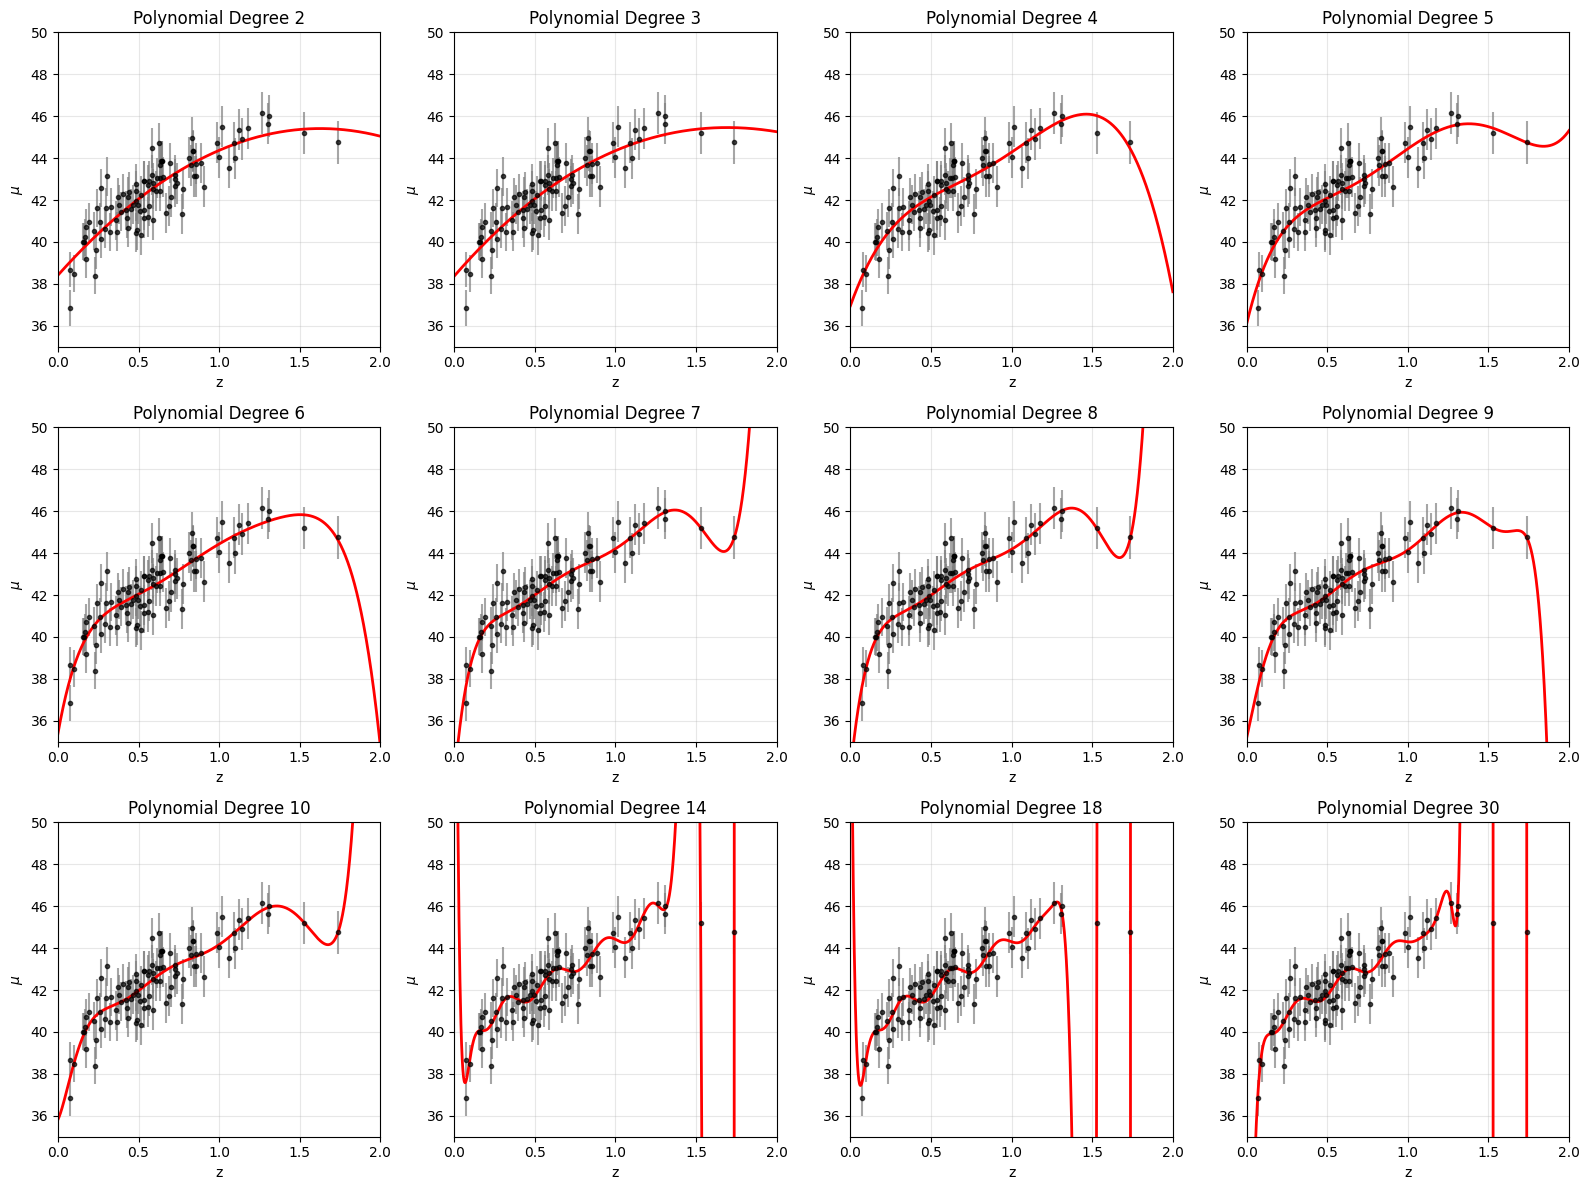

In [11]:
from astroML.linear_model import PolynomialRegression

poly_models = [] 
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 18, 30]
for deg in degrees:
    model = PolynomialRegression(degree=deg, fit_intercept=True)
    model.fit(z_sample[:, None], mu_sample, dmu)
    poly_models.append(model)
    print(f"Degree {deg} model parameters:", model.coef_)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()  # Flatten to make indexing easier

for i, (model, deg) in enumerate(zip(poly_models, degrees)):
    # Plot data points with error bars
    axes[i].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha=0.7)
    
    # Plot polynomial fit
    mu_fit = model.predict(z_fit[:, None])
    axes[i].plot(z_fit, mu_fit, 'r-', linewidth=2)
    
    # Set labels and limits
    axes[i].set_xlabel("z")
    axes[i].set_ylabel(r"$\mu$")
    axes[i].set_xlim(0, 2)
    axes[i].set_ylim(35, 50)
    axes[i].set_title(f'Polynomial Degree {deg}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Looking at the resulting plots we can think that the best models are the one with degrees between 4 and 6.

## Basis Function Regression
The idea behind basis function regression is to extend the linear model to a more general one, so the equation becomes:
$$
y_i = \theta_0 \phi_0(x_i) + \theta_1 \phi_1(x_i) + ... + \theta_n \phi_n(x_i) + \epsilon_i
$$
where $\phi_i(x)$ are the basis functions, which can be polynomials, trigonometric functions, etc.
The design matrix becomes:
$$
X =
\begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1) & ... & \phi_n(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & ... & \phi_n(x_2) \\
\vdots & \vdots & ... & \vdots \\
\phi_0(x_N) & \phi_1(x_N) & ... & \phi_n(x_N)
\end{pmatrix}
$$  
where $\phi_0(x) = 1$.

In the following case we use Gaussian basis functions.

Basis function n=2 model parameters: [ 12.99040428  50.51331313 127.97212219]
Basis function n=3 model parameters: [-20.75435804 128.04280365  -2.51029474 144.53950881]
Basis function n=4 model parameters: [ 1.35653938 45.62683199 15.21530881 34.39419562 40.56480758]
Basis function n=5 model parameters: [-5.84700595 41.67521015 10.14806884 36.57902578 14.62110518 42.86434529]
Basis function n=6 model parameters: [ 1.23225317 26.12581513  9.58129636 21.28679694 14.39510617 20.31489487
 20.9947413 ]
Basis function n=7 model parameters: [-23.53424762  38.70874323   8.59188187  33.08990073  11.65029476
  35.72118645   8.15371649  41.913853  ]
Basis function n=8 model parameters: [-7.36228287 22.03536881  9.25313536 16.49106352 13.99035303 13.6621661
 19.3174517   7.96872465 25.79228307]
Basis function n=9 model parameters: [ 0.95181394 14.57196947  8.06435007 10.75152022 10.82390207 10.31350288
 11.21438274 13.06693161  6.42904597 18.89408639]
Basis function n=10 model parameters: [ 25.964

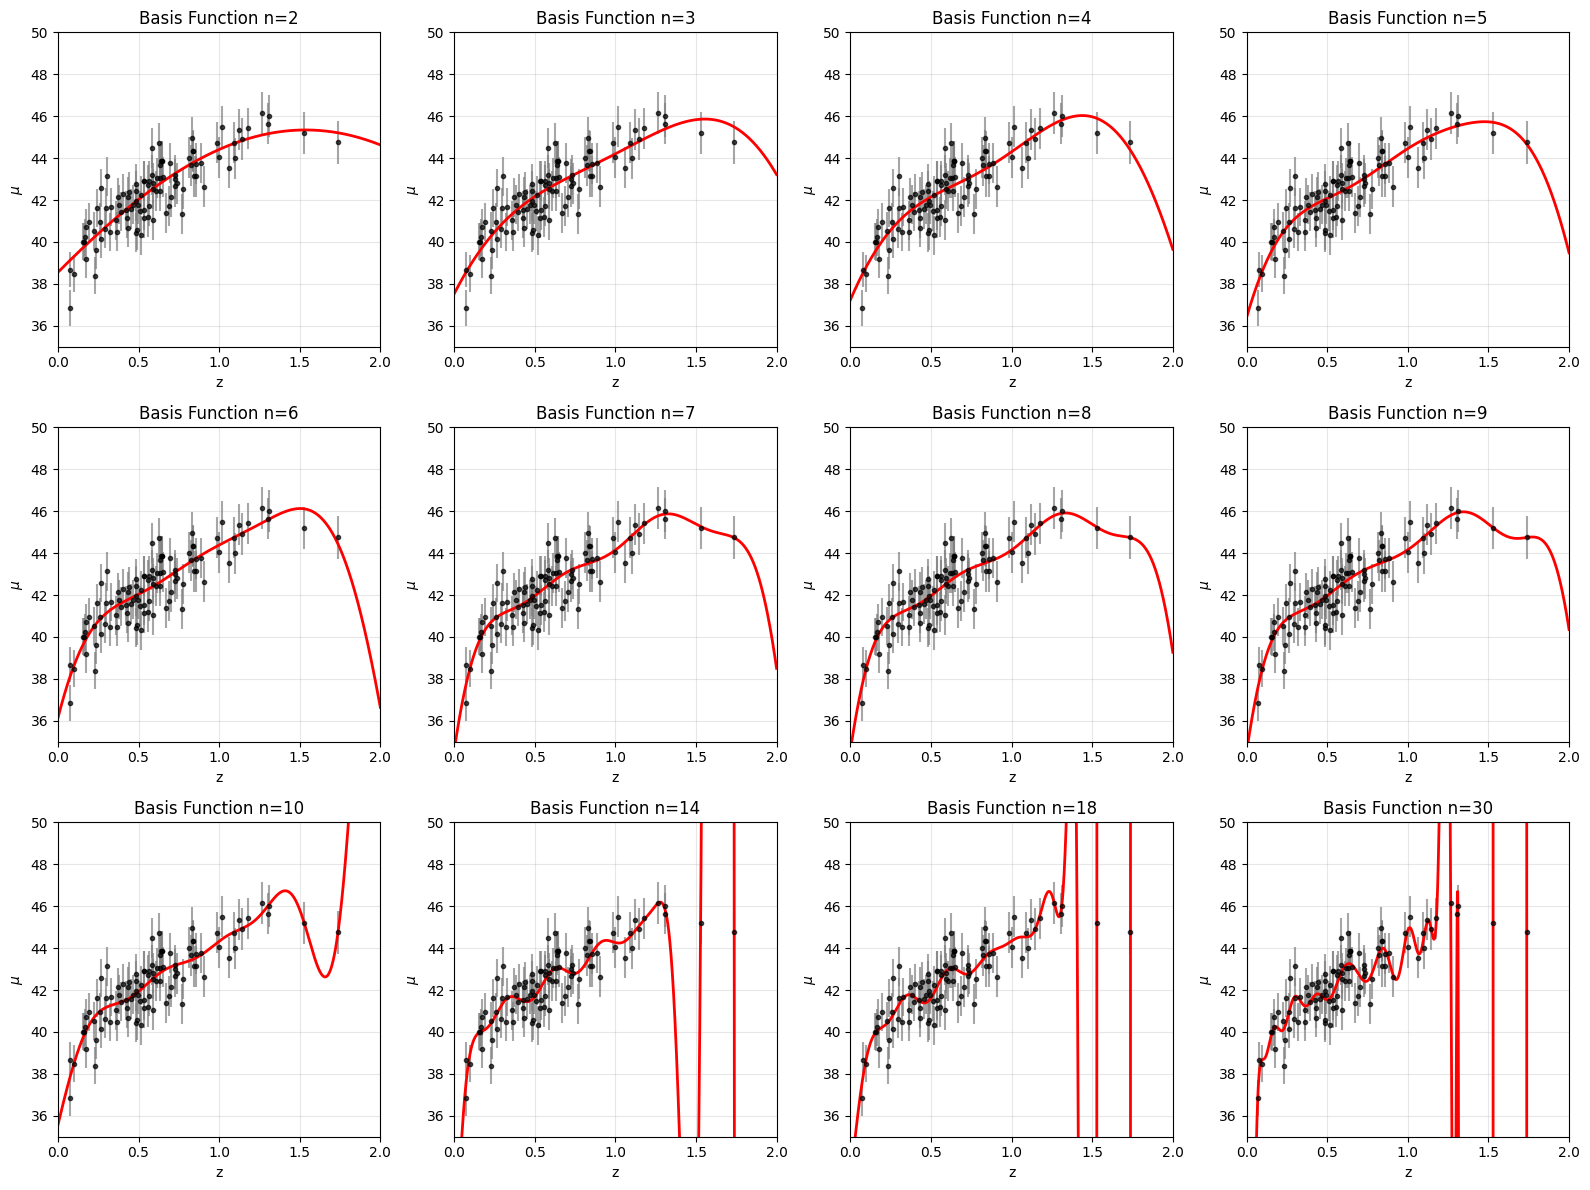

In [12]:
from astroML.linear_model import BasisFunctionRegression

basis_models = []
for n in degrees:
    basis_mu = np.linspace(0, 2, n)[:, np.newaxis]
    basis_sigma = (basis_mu[1] - basis_mu[0])

    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    model.fit(z_sample[:, None], mu_sample, dmu)
    basis_models.append(model)
    print(f"Basis function n={n} model parameters:", model.coef_)

plt.figure(figsize=(16, 12))

for i, (model, n) in enumerate(zip(basis_models, degrees)):
    plt.subplot(3, 4, i + 1)
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha=0.7)
    mu_fit = model.predict(z_fit[:, None])
    plt.plot(z_fit, mu_fit, 'r-', linewidth=2)
    plt.xlabel("z")
    plt.ylabel(r"$\mu$")
    plt.xlim(0, 2)
    plt.ylim(35, 50)
    plt.title(f'Basis Function n={n}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Looking at the resulting plots we can think that the best models are the one with $n$ between 4 and 6.

## Kernel Regression
## Kernel Regression
The idea behind kernel regression is estimate the value of the function, $f$, in a given $x$ as a weighted sum of the observed values, where the weights are given by a kernel function.
$$
\hat{f}(x|K,h) = \sum_{i=1}^{N} w_i y_i \hspace{1cm} w_i = \frac{K\big(\frac{x - x_i}{h}\big)}{\sum_{j=1}^{N} K\big(\frac{x - x_j}{h}\big)}
$$
where $K$ is the kernel function and $h$ is the **bandwidth**, which controls the smoothness of the resulting function.
This model is also known as **Nadaraya-Watson kernel regression**.

In our case we use a Gaussian kernel:
$$
K(u) = e^{-\frac{u^2}{2}}
$$

The crucial difference with the previous models is that now we have $N$ gaussian functions, one for each data point, and the parameters $w_i$ are the weights of each kernel.

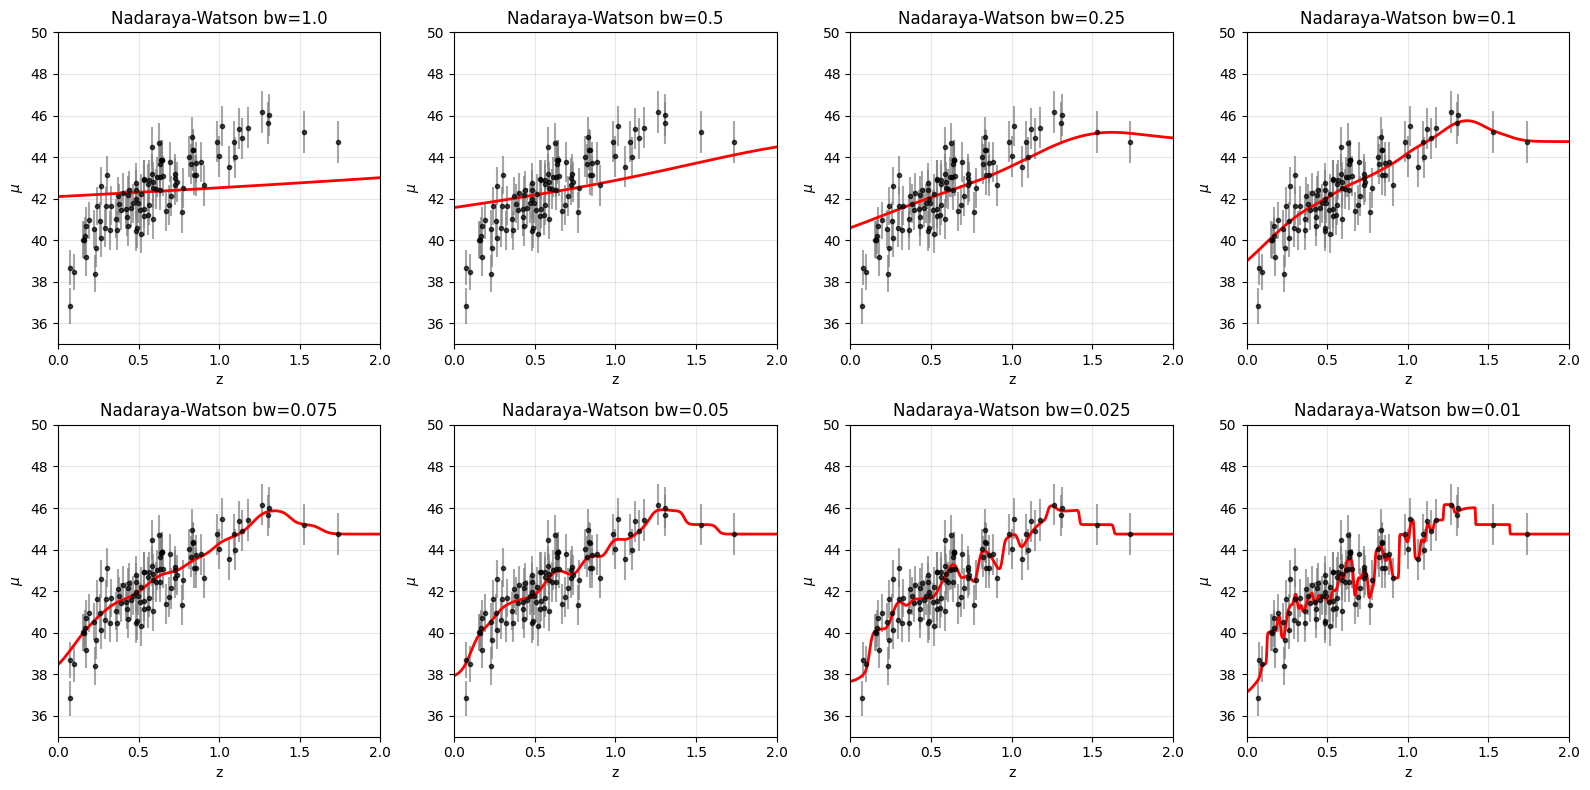

In [13]:
from astroML.linear_model import NadarayaWatson

nw_models = []
bandwidths = [1.0, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01]

for bw in bandwidths:
    model = NadarayaWatson(h=bw)
    model.fit(z_sample[:, np.newaxis], mu_sample)
    nw_models.append(model)

plt.figure(figsize=(16, 8))

for i, (model, bw) in enumerate(zip(nw_models, bandwidths)):
    plt.subplot(2, 4, i + 1)
    # plot data with error bars
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', alpha=0.7)
    # model prediction
    mu_fit = model.predict(z_fit[:, np.newaxis])
    plt.plot(z_fit, mu_fit, 'r-', linewidth=2)
    plt.xlabel("z")
    plt.ylabel(r"$\mu$")
    plt.xlim(0, 2)
    plt.ylim(35, 50)
    plt.title(f'Nadaraya-Watson bw={bw}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Looking at the resulting plots we can think that the best models are the one with bandwith between 0.075 and 0.05.

## Train/Test split and Cross-Validation

In [14]:
from sklearn.model_selection import train_test_split

val_size=0.3

X_train, X_val, y_train, y_val, dy_train, dy_val = train_test_split(z_sample[:, np.newaxis], mu_sample, dmu, test_size=val_size, random_state=10)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")


Training set size: 70
Validation set size: 30


### Cross-Validation

We already talk about cross-validation in the exercise 11, but here we want to go deeper in the concept.

We want to study how evolves the **Mean Squared Error (MSE)** as a function of the model complexity, for different models. 
Than we want to choose the best model as the one that minimizes the MSE on the validation set.

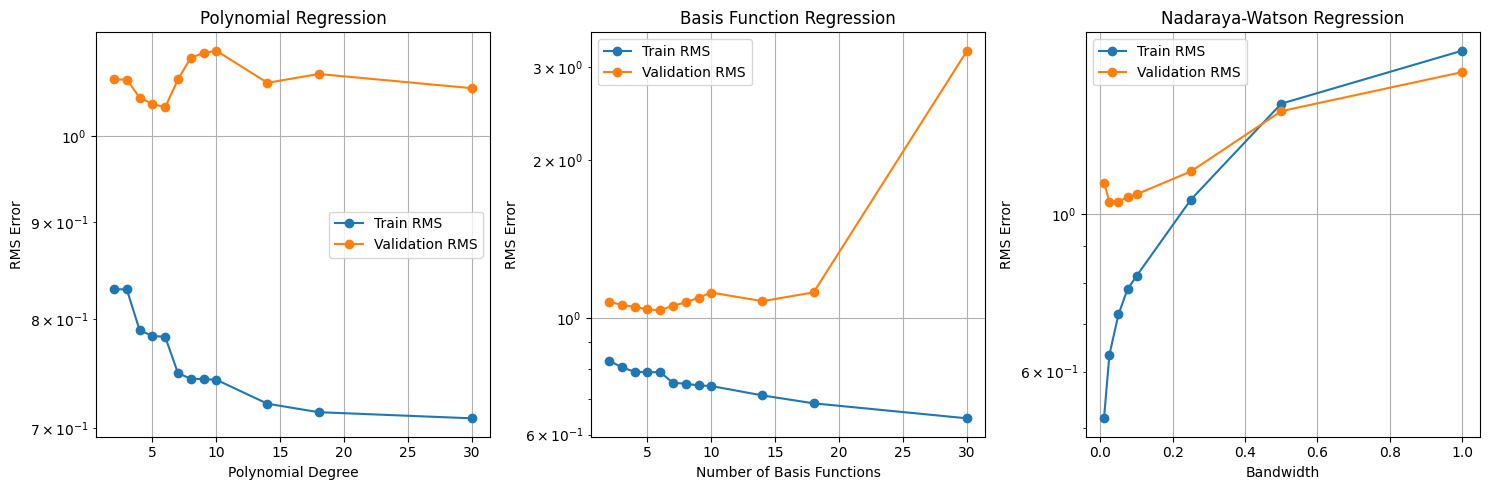

In [15]:
def rms(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

poly_train_errors = []
poly_val_errors = []
for deg in degrees:
    model = PolynomialRegression(degree=deg, fit_intercept=True)
    model.fit(X_train, y_train, dy_train)
    rms_train = rms(y_train, model.predict(X_train))
    rms_val = rms(y_val, model.predict(X_val))
    poly_train_errors.append(rms_train)
    poly_val_errors.append(rms_val)

basis_train_errors = []
basis_val_errors = []
for n in degrees:
    basis_mu = np.linspace(0, 2, n)[:, np.newaxis]
    basis_sigma = (basis_mu[1] - basis_mu[0])
    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    model.fit(X_train, y_train, dy_train)
    rms_train = rms(y_train, model.predict(X_train))
    rms_val = rms(y_val, model.predict(X_val))
    basis_train_errors.append(rms_train)
    basis_val_errors.append(rms_val)

nw_train_errors = []
nw_val_errors = []
for bw in bandwidths:
    model = NadarayaWatson(h=bw)    
    model.fit(X_train, y_train, dy_train)
    rms_train = rms(y_train, model.predict(X_train))
    rms_val = rms(y_val, model.predict(X_val))
    nw_train_errors.append(rms_train)
    nw_val_errors.append(rms_val)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
poly_train_errors = np.array(poly_train_errors)
poly_val_errors = np.array(poly_val_errors)
plt.plot(degrees, poly_train_errors, 'o-', label='Train RMS')
plt.plot(degrees, poly_val_errors, 'o-', label='Validation RMS')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
basis_train_errors = np.array(basis_train_errors)
basis_val_errors = np.array(basis_val_errors)
plt.plot(degrees, basis_train_errors, 'o-', label='Train RMS')
plt.plot(degrees, basis_val_errors, 'o-', label='Validation RMS')
plt.yscale('log')
plt.xlabel('Number of Basis Functions')
plt.ylabel('RMS Error')
plt.title('Basis Function Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
nw_train_errors = np.array(nw_train_errors)
nw_val_errors = np.array(nw_val_errors)
plt.plot(bandwidths, nw_train_errors, 'o-', label='Train RMS')
plt.plot(bandwidths, nw_val_errors, 'o-', label='Validation RMS')
plt.yscale('log')
plt.xlabel('Bandwidth')
plt.ylabel('RMS Error')
plt.title('Nadaraya-Watson Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Best model selection

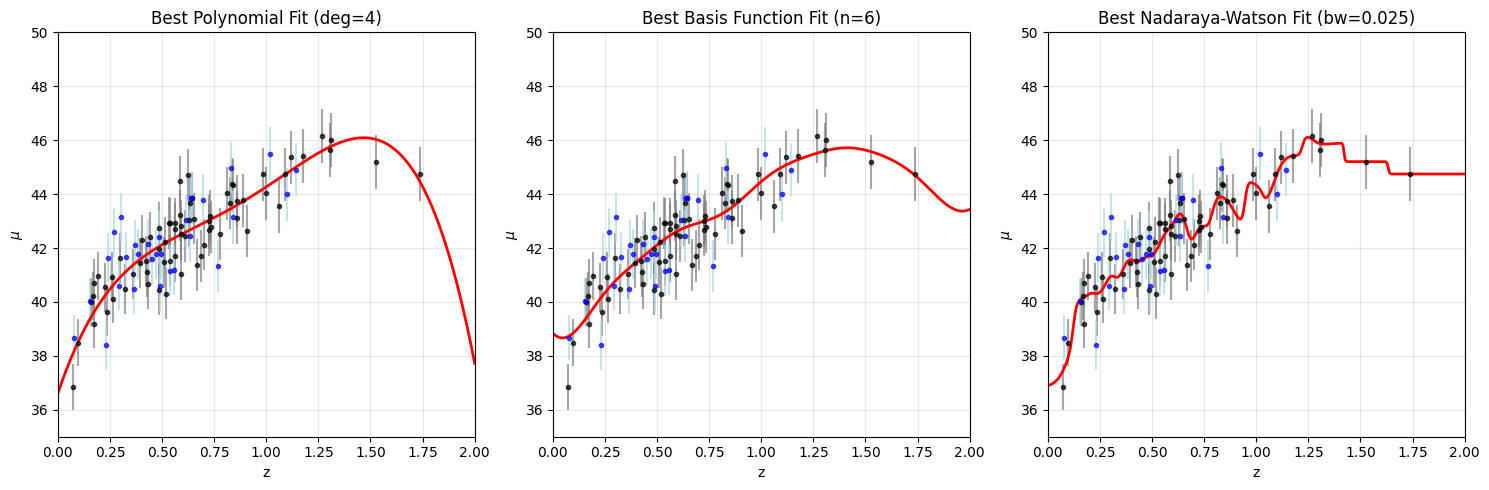

In [16]:
best_poly_degree = np.argmin(poly_val_errors)
best_basis_n = np.argmin(basis_val_errors) + 2 
best_nw_bw = bandwidths[np.argmin(nw_val_errors)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.errorbar(X_train, y_train, dy_train, fmt='.k', ecolor='gray', alpha=0.7)
plt.errorbar(X_val, y_val, dy_val, fmt='.b', ecolor='lightblue', alpha=0.7)
best_poly_model = PolynomialRegression(degree=best_poly_degree, fit_intercept=True)
best_poly_model.fit(X_train, y_train, dy_train)
mu_fit = best_poly_model.predict(z_fit[:, None])
plt.plot(z_fit, mu_fit, 'r-', linewidth=2)
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Best Polynomial Fit (deg={best_poly_degree})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.errorbar(X_train, y_train, dy_train, fmt='.k', ecolor='gray', alpha=0.7)
plt.errorbar(X_val, y_val, dy_val, fmt='.b', ecolor='lightblue', alpha=0.7)
basis_mu = np.linspace(0, 2, best_basis_n)[:, np.newaxis]
basis_sigma = (basis_mu[1] - basis_mu[0]) / 2
best_basis_model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
best_basis_model.fit(X_train, y_train, dy_train)
mu_fit = best_basis_model.predict(z_fit[:, None])
plt.plot(z_fit, mu_fit, 'r-', linewidth=2)
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Best Basis Function Fit (n={best_basis_n})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.errorbar(X_train, y_train, dy_train, fmt='.k', ecolor='gray', alpha=0.7)
plt.errorbar(X_val, y_val, dy_val, fmt='.b', ecolor='lightblue', alpha=0.7)
best_nw_model = NadarayaWatson(h=best_nw_bw)
best_nw_model.fit(X_train, y_train, dy_train)
mu_fit = best_nw_model.predict(z_fit[:, None])
plt.plot(z_fit, mu_fit, 'r-', linewidth=2)   
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title('Best Nadaraya-Watson Fit (bw={:.3f})'.format(best_nw_bw))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
